In [75]:
from google_play_scraper import reviews, Sort
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
APP_ID = "br.com.intermedium"
LANGUAGE = "pt-br"
COUNTRY = "br"

TOTAL_ROWS_OF_DATA = 10000

In [79]:
results, _ = reviews(
    APP_ID,
    lang=LANGUAGE,
    country=COUNTRY,
    sort=Sort.NEWEST,
    count=TOTAL_ROWS_OF_DATA,
    filter_score_with=None,
)

In [80]:
data = []

for result in results:
    review_id = result["reviewId"]
    content = result["content"]
    score = result["score"]
    thumbs_up_count = result["thumbsUpCount"]
    review_created_version = result["reviewCreatedVersion"]
    at = result["at"]
    reply_content = result["replyContent"]
    replied_at = result["repliedAt"]
    app_version = result["appVersion"]

    data.append(
        {
            "Review ID": review_id,
            "Content": content,
            "Score": score,
            "Thumbs Up Count": thumbs_up_count,
            "Review Created Version": review_created_version,
            "At": at,
            "Reply Content": reply_content,
            "Replied At": replied_at,
            "App Version": app_version,
        }
    )

df = pd.DataFrame(data)

In [81]:
df.head()

,Review ID,Content,Score,Thumbs Up Count,Review Created Version,At,Reply Content,Replied At,App Version
0,f1e01226-741c-4937-b39d-8f1ec934019a,muito bom,5,0,11.5.3,2023-05-28 11:20:03,"Oi, tudo bem? Obrigado pelo seu feedback, fica...",2023-05-28 11:47:48,11.5.3
1,6722b042-17fe-47cb-b1a4-34c41b4b7e23,Mais alguém com problema pra entrar no app? Pe...,3,0,11.2.5,2023-05-28 11:10:15,None,NaT,11.2.5
2,d8d8f326-013e-473f-9fb0-e66bf924b554,otimo,5,0,11.5.3,2023-05-28 11:07:35,Olá! Agradecemos pela parceria e confiança! Qu...,2023-05-28 11:17:53,11.5.3
3,9cf7e920-e5bf-4207-8c4c-d3d5cbc96950,Péssimo com oferecimento de cartões de crédito,1,0,11.5.3,2023-05-28 10:48:43,Oi! Gostaríamos de entender melhor o que está ...,2023-05-28 11:17:49,11.5.3
4,22c04952-e1c1-4e19-8d04-3517105da2ff,muito show esse app 100/100,5,0,11.5.3,2023-05-28 10:45:28,"Oi, tudo bem? Obrigado pelo seu feedback, fica...",2023-05-28 10:47:44,11.5.3


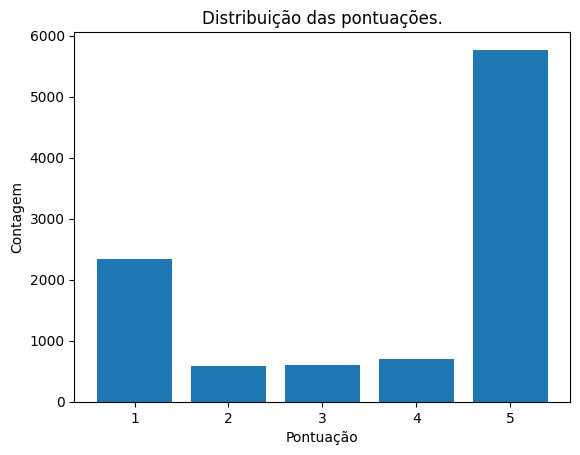

In [82]:
score_counts = df['Score'].value_counts()
score_counts = score_counts.sort_index()

plt.bar(score_counts.index, score_counts.values)

plt.title('Distribuição das pontuações.')
plt.xlabel('Pontuação')
plt.ylabel('Contagem')

plt.show()

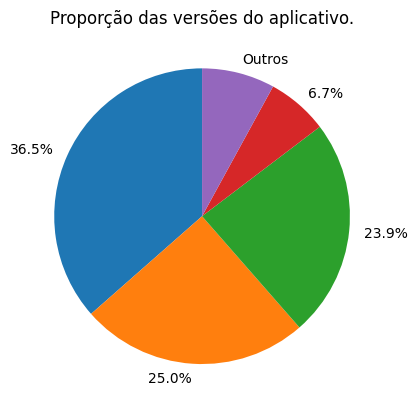

In [83]:

app_version_counts = df['App Version'].value_counts(normalize=True)

major_values = app_version_counts[app_version_counts >= 0.05]
other_values = app_version_counts[app_version_counts < 0.05].sum()

major_labels = [f'{v:.1%}' for v in major_values]
other_labels = ['Outros']
labels = major_labels + other_labels

plt.pie(major_values.values.tolist() + [other_values],
        labels=labels, startangle=90)

plt.title('Proporção das versões do aplicativo.')
plt.show()

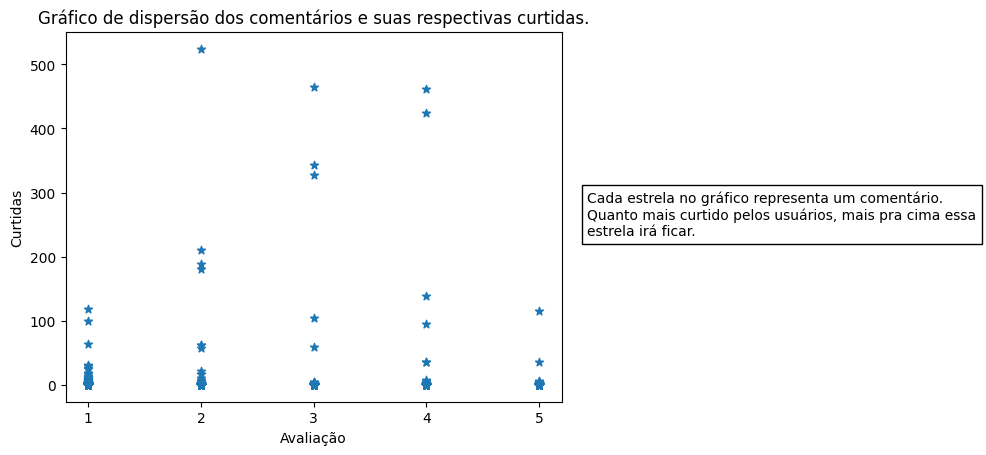

In [165]:
x = df['Score']
y = df['Thumbs Up Count']

plt.scatter(x, y, marker='*')
plt.xlabel('Avaliação')
plt.ylabel('Curtidas')
plt.title('Gráfico de dispersão dos comentários e suas respectivas curtidas.')

plt.xticks(range(int(min(x)), int(max(x)) + 1))

texto = 'Cada estrela no gráfico representa um comentário.\nQuanto mais curtido pelos usuários, mais pra cima essa\nestrela irá ficar.'
plt.text(0.94, 0.5, texto, bbox=dict(facecolor='white', edgecolor='black'), transform=plt.gcf().transFigure, fontsize=10, va='center', ha='left')

plt.show()
